In [1]:
import numpy as np
import pandas as pd
import os
from scipy import stats

# Construct the path to the data file in an OS-independent way
data_dir='data'
filename='197 - Adjusted R-Squared - 1.02.+Multiple+linear+regression.csv'
# Get the current working directory of the script
current_dir = os.getcwd()

# Construct the path to the data file by going up one level ('..')
# and then into the 'data' folder.
file_path = os.path.join(current_dir, '..', '..', data_dir, filename)

# Normalize the path to resolve '..' and get the absolute path
file_path = os.path.abspath(file_path)

df = pd.read_csv(file_path) # đọc file csv với dấu chấm phẩy để ngăn cách các field và dấu phẩy thập phân
display(df)
df.info()  # hiển thị thông tin về dataframe

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2
...,...,...,...
79,1936,3.71,3
80,1810,3.71,1
81,1987,3.73,3
82,1962,3.76,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SAT         84 non-null     int64  
 1   GPA         84 non-null     float64
 2   Rand 1,2,3  84 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 2.1 KB


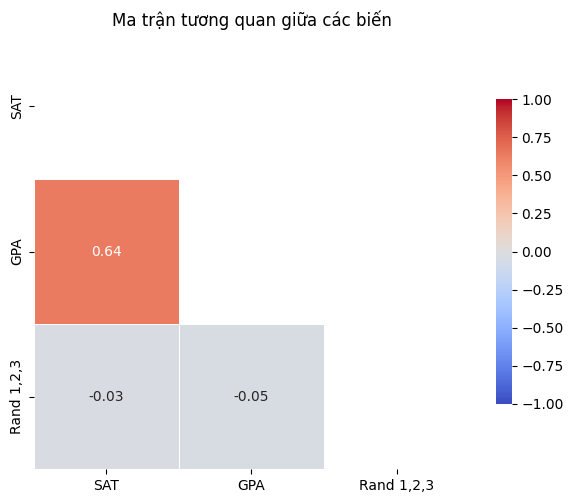

In [3]:
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

# Tính ma trận tương quan
corr = df.corr()

# Vẽ heatmap (chỉ hiển thị nửa dưới để dễ nhìn)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(6,5))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.7})
plt.title("Ma trận tương quan giữa các biến")
plt.tight_layout()
plt.show()

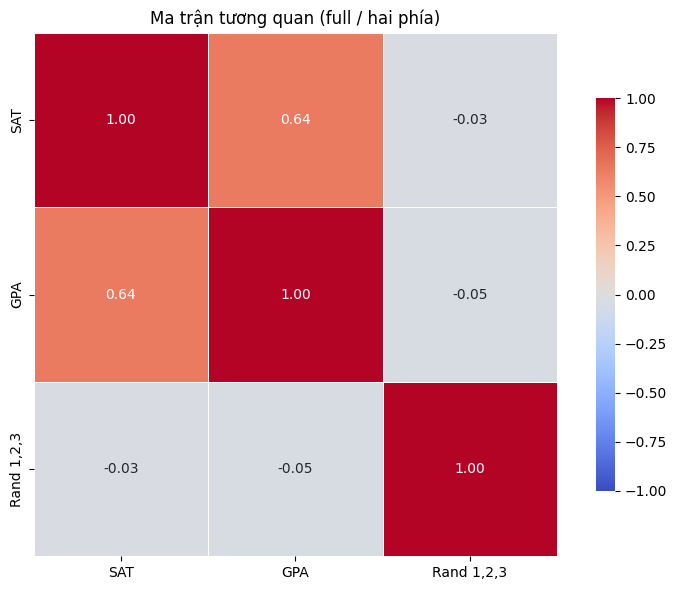

In [4]:
# ...existing code...
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Tính ma trận tương quan (Pearson mặc định; thay method nếu cần: 'spearman'/'kendall')
corr = df.corr()

# Vẽ heatmap "hai phía" (không mask, hiển thị cả 2 tam giác)
plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)
plt.title("Ma trận tương quan (full / hai phía)")
plt.tight_layout()
plt.show()
# ...existing code...

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2
...,...,...,...
79,1936,3.71,3
80,1810,3.71,1
81,1987,3.73,3
82,1962,3.76,1


Target: Rand 1,2,3
Train size: 67, Test size: 17
R2 (test): -0.1649
RMSE (test): 0.9244
MAE (test): 0.8232

Coefficients:
  SAT: 0.039774
  GPA: -0.146542
Intercept: 2.029851

CV R2 (5-fold): mean=-0.0887, std=0.0582
CV RMSE (5-fold): mean=0.8753


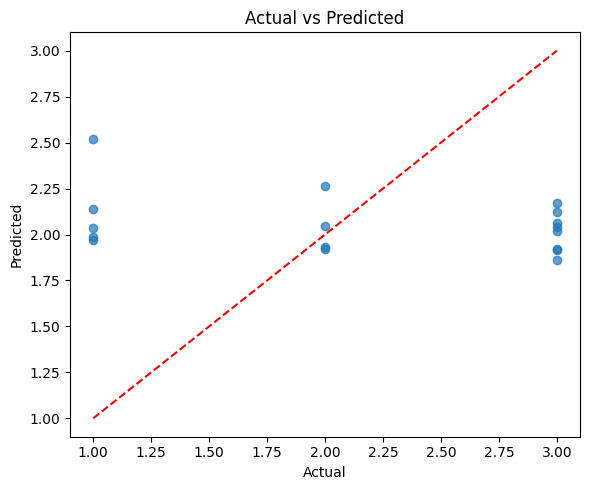

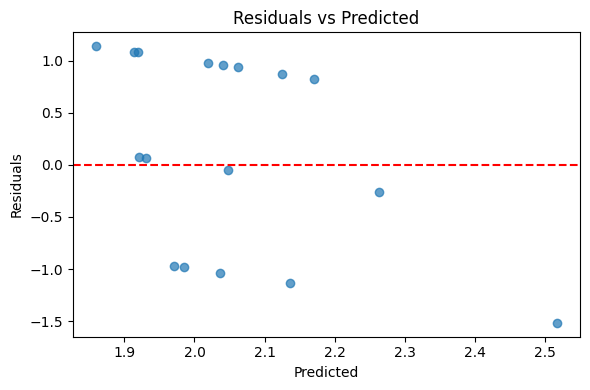

In [7]:
# ...existing code...
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Chọn chỉ các cột số và loại bỏ hàng có NaN
num = df.select_dtypes(include=[np.number]).dropna()
display(num)
if num.shape[1] < 2:
    raise ValueError("Cần ít nhất 2 cột số trong df để hồi quy đa biến.")

# Mặc định: dùng cột số cuối cùng làm target (thay tên nếu cần)
target = num.columns[-1]
X = num.drop(columns=[target])
y = num[target].values

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline: chuẩn hóa + hồi quy tuyến tính
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Target: {target}")
print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")
print(f"R2 (test): {r2:.4f}")
print(f"RMSE (test): {rmse:.4f}")
print(f"MAE (test): {mae:.4f}")

# Hệ số (LinearRegression cuối cùng trong pipeline)
lr = model.named_steps['linearregression']
coefs = lr.coef_
feat_names = X.columns.tolist()
print("\nCoefficients:")
for f, c in zip(feat_names, coefs):
    print(f"  {f}: {c:.6f}")
print(f"Intercept: {lr.intercept_:.6f}")

# Cross-validation (R2 và MSE)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
cv_mse = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"\nCV R2 (5-fold): mean={cv_r2.mean():.4f}, std={cv_r2.std():.4f}")
print(f"CV RMSE (5-fold): mean={np.sqrt(cv_mse).mean():.4f}")

# Plot: Actual vs Predicted
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.tight_layout()
plt.show()

# Plot: Residuals
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.tight_layout()
plt.show()
# ...existing code...